In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [4]:
# Loading data 
data_raw=pd.read_csv("uomds20/train.csv")

In [15]:
# Below print statements used to identify missing values
print(data_raw.isnull().sum())

tripid                         0
additional_fare              202
duration                     202
meter_waiting                202
meter_waiting_fare           202
meter_waiting_till_pickup    202
pickup_time                    0
drop_time                      0
pick_lat                       0
pick_lon                       0
drop_lat                       0
drop_lon                       0
fare                         137
label                          0
dtype: int64


In [5]:
data_raw.dtypes

tripid                         int64
additional_fare              float64
duration                     float64
meter_waiting                float64
meter_waiting_fare           float64
meter_waiting_till_pickup    float64
pickup_time                   object
drop_time                     object
pick_lat                     float64
pick_lon                     float64
drop_lat                     float64
drop_lon                     float64
fare                         float64
label                         object
dtype: object

In [10]:
# Change data types of columns
data_raw['pickup_time']= pd.to_datetime(data_raw['pickup_time']) 
data_raw['drop_time']= pd.to_datetime(data_raw['drop_time']) 
data_raw = data_raw.astype({'tripid': 'object'})

In [11]:
data_raw.dtypes

tripid                               object
additional_fare                     float64
duration                            float64
meter_waiting                       float64
meter_waiting_fare                  float64
meter_waiting_till_pickup           float64
pickup_time                  datetime64[ns]
drop_time                    datetime64[ns]
pick_lat                            float64
pick_lon                            float64
drop_lat                            float64
drop_lon                            float64
fare                                float64
label                                object
dtype: object

# Data Exploration - Univariate

In [12]:
# Describing all the Numerical Features
data_raw.describe()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
count,16974.000000,16974.000000,16974.000000,16974.000000,16974.000000,17176.000000,17176.000000,17176.000000,17176.000000,17039.000000
mean,13.719651,1702.858077,629.074231,32.057666,112.466832,6.965499,79.998389,6.968587,79.997534,312.655466
std,98.975052,8120.160818,8063.260669,465.483573,442.054812,0.210760,0.243384,0.378669,0.359648,605.300565
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.937600,79.819100,5.941860,45.307700,0.000000
25%,10.500000,548.000000,33.000000,0.000000,26.000000,6.865077,79.870400,6.865625,79.870100,125.515000
50%,10.500000,1009.500000,123.000000,0.116600,73.000000,6.914105,79.898600,6.916160,79.899100,211.180000
75%,10.500000,1803.000000,351.000000,14.341800,144.000000,7.043057,79.956600,7.047195,79.960225,366.465000
max,12795.030000,453872.000000,453650.000000,26198.601400,51288.000000,8.051010,81.009600,48.132000,81.009700,26945.990000


In [13]:
# Describing all the Categorical Features
data_raw.describe(include=['O'])

,tripid,label
count,17176,17176
unique,17172,2
top,195424599,correct
freq,2,15495


In [14]:
data_raw.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,2019-11-01 03:34:00,2019-11-01 03:51:00,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [17]:
#Drop the rows which are included null values
cleaned_df = data_raw.dropna()

## Correlation matrics

In [18]:
cleaned_df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
additional_fare,1.00,-0.00,0.20,0.20,0.00,0.01,0.00,0.00,0.00,0.32
duration,-0.00,1.00,0.97,0.97,0.04,-0.03,-0.03,-0.02,-0.01,0.87
meter_waiting,0.20,0.97,1.00,1.00,0.03,-0.02,-0.01,-0.01,-0.01,0.87
meter_waiting_fare,0.20,0.97,1.00,1.00,0.03,-0.02,-0.01,-0.01,-0.01,0.87
meter_waiting_till_pickup,0.00,0.04,0.03,0.03,1.00,0.01,0.02,0.01,0.01,0.05
pick_lat,0.01,-0.03,-0.02,-0.02,0.01,1.00,0.52,0.56,0.34,-0.02
pick_lon,0.00,-0.03,-0.01,-0.01,0.02,0.52,1.00,0.30,0.65,-0.04
drop_lat,0.00,-0.02,-0.01,-0.01,0.01,0.56,0.30,1.00,-0.42,-0.02
drop_lon,0.00,-0.01,-0.01,-0.01,0.01,0.34,0.65,-0.42,1.00,-0.01
fare,0.32,0.87,0.87,0.87,0.05,-0.02,-0.04,-0.02,-0.01,1.00


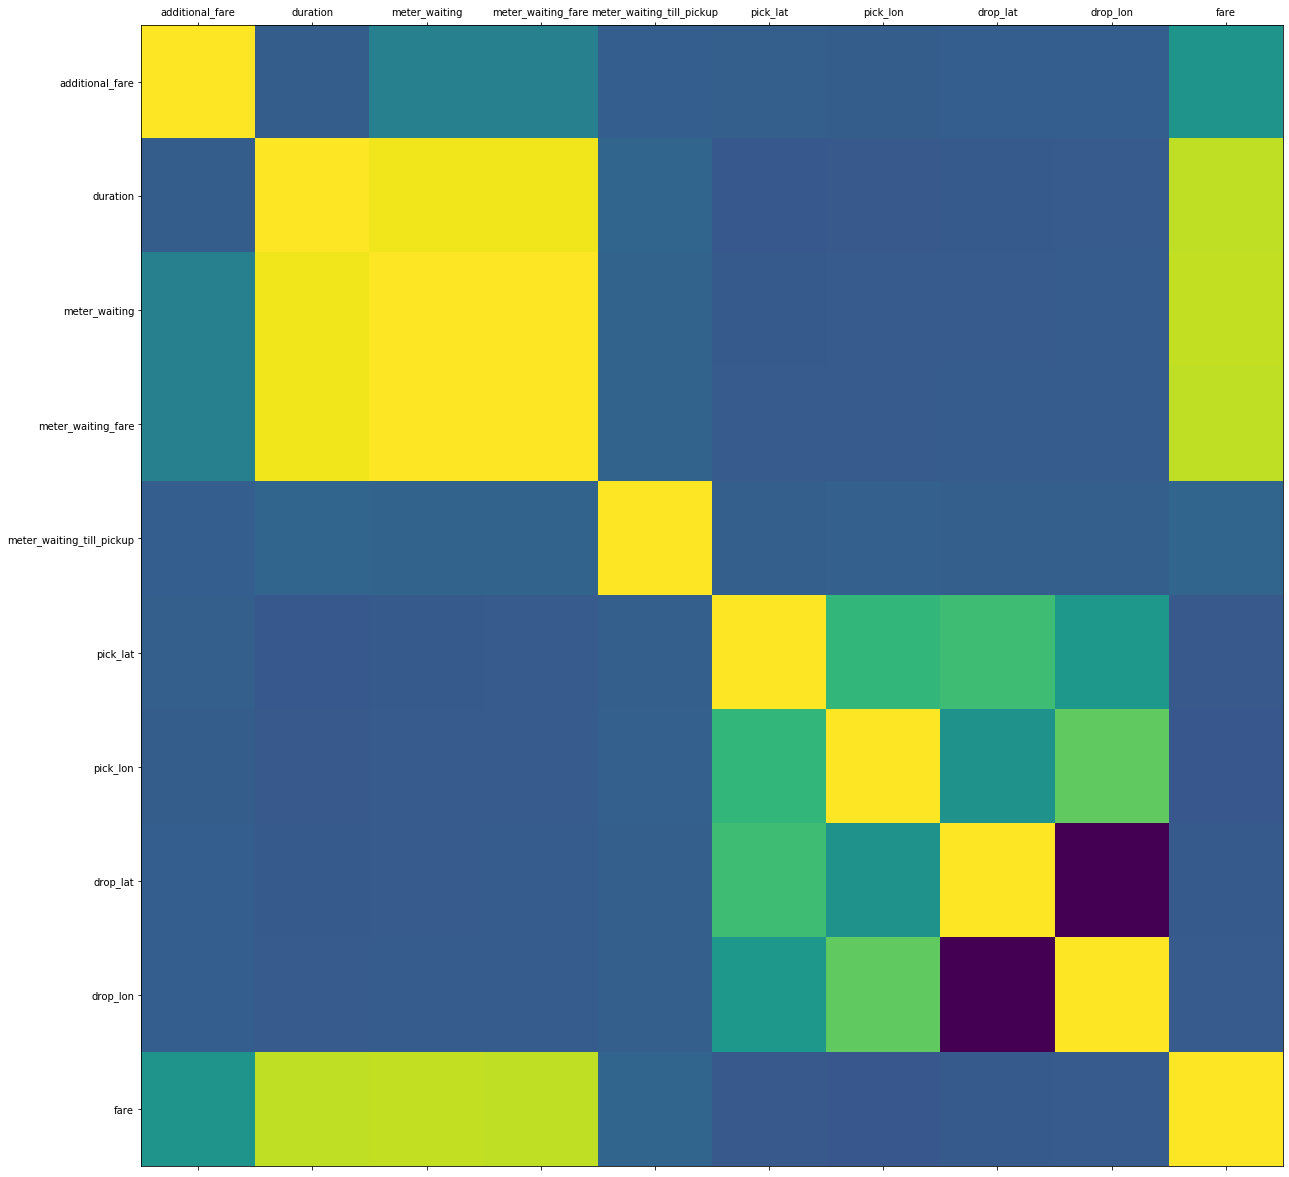

In [19]:
corr = cleaned_df.corr() 
fig, ax = plt.subplots(figsize=(21, 21)) 
ax.matshow(corr) 
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

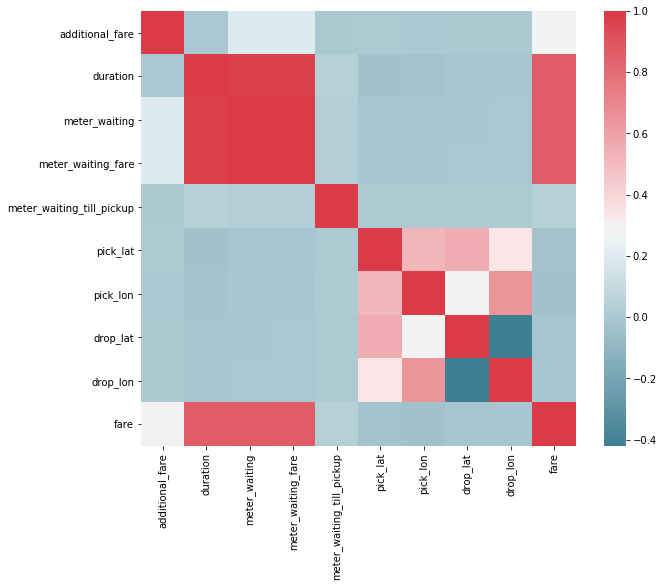

In [20]:
import seaborn as sns 
f, ax = plt.subplots(figsize=(10, 8))
corr = cleaned_df.corr() 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)